# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
        * [Numpy Array Creation](#numpy-array-creation)  
        * [Numpy Printing Array](#numpy-printing-array)  
        * [Numpy Operations](#numpy-operations)  
        * [Numpy Universal Functions](#numpy-universal-functions)
        * [Numpy Plotting](#numpy-plotting)
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)  
        * [Matplotlib Basic Types](#matplotlib-basics-types)  
        * [Matplotlib Plotting Arrays](#matplotlib-plotting-arrays)  
        * [Matplotlib Statistical Plots](#matplotlib-statistical-plots)  
        * [Matplotlib Unstructured Corodinates](matplotlib-unstructured-coordinates)  
        * [Matplotlib 3D Plots](#matplotlib-3d-plots)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
%pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

In [2]:
import pandas as pd
import numpy as np

#### Pandas Object Creation   

[Back to contents](#table-of-contents)

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.124944,1.102123,0.213161,0.405762
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067
2013-01-03,1.187005,0.823328,-0.992188,0.464905
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-05,1.400376,0.670664,-0.565511,-0.757025
2013-01-06,0.302593,0.869775,1.110737,1.642310


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,-1.124944,1.102123,0.213161,0.405762
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067
2013-01-03,1.187005,0.823328,-0.992188,0.464905
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-05,1.400376,0.670664,-0.565511,-0.757025


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067
2013-01-03,1.187005,0.823328,-0.992188,0.464905
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-05,1.400376,0.670664,-0.565511,-0.757025
2013-01-06,0.302593,0.869775,1.110737,1.642310


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[-1.12494425,  1.10212343,  0.21316051,  0.40576205],
       [-0.46995007, -0.6762816 , -2.11221019,  0.42606716],
       [ 1.18700495,  0.82332806, -0.99218809,  0.46490515],
       [ 1.09458457, -1.17465305, -2.28704303, -0.89471245],
       [ 1.40037593,  0.67066423, -0.56551066, -0.75702489],
       [ 0.30259341,  0.86977547,  1.11073681,  1.64230979]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.398277,0.269159,-0.772176,0.214551
std,1.019246,0.948824,1.318930,0.933477
min,-1.124944,-1.174653,-2.287043,-0.894712
25%,-0.276814,-0.339545,-1.832205,-0.466328
50%,0.698589,0.746996,-0.778849,0.415915
75%,1.163900,0.858164,0.018493,0.455196
max,1.400376,1.102123,1.110737,1.642310


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.124944,-0.469950,1.187005,1.094585,1.400376,0.302593
B,1.102123,-0.676282,0.823328,-1.174653,0.670664,0.869775
C,0.213161,-2.112210,-0.992188,-2.287043,-0.565511,1.110737
D,0.405762,0.426067,0.464905,-0.894712,-0.757025,1.642310


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.405762,0.213161,1.102123,-1.124944
2013-01-02,0.426067,-2.112210,-0.676282,-0.469950
2013-01-03,0.464905,-0.992188,0.823328,1.187005
2013-01-04,-0.894712,-2.287043,-1.174653,1.094585
2013-01-05,-0.757025,-0.565511,0.670664,1.400376
2013-01-06,1.642310,1.110737,0.869775,0.302593


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067
2013-01-05,1.400376,0.670664,-0.565511,-0.757025
2013-01-03,1.187005,0.823328,-0.992188,0.464905
2013-01-06,0.302593,0.869775,1.110737,1.642310
2013-01-01,-1.124944,1.102123,0.213161,0.405762


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01   -1.124944
2013-01-02   -0.469950
2013-01-03    1.187005
2013-01-04    1.094585
2013-01-05    1.400376
2013-01-06    0.302593
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-05,1.400376,0.670664,-0.565511,-0.757025


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A   -1.124944
B    1.102123
C    0.213161
D    0.405762
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.094585,-1.174653
2013-01-05,1.400376,0.670664


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.469950,-2.112210
2013-01-03,1.187005,-0.992188
2013-01-05,1.400376,-0.565511


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

-0.676281602581387

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-03,1.187005,0.823328,-0.992188,0.464905
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712
2013-01-05,1.400376,0.670664,-0.565511,-0.757025
2013-01-06,0.302593,0.869775,1.110737,1.642310


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.102123,0.213161,0.405762
2013-01-02,NaN,NaN,NaN,0.426067
2013-01-03,1.187005,0.823328,NaN,0.464905
2013-01-04,1.094585,NaN,NaN,NaN
2013-01-05,1.400376,0.670664,NaN,NaN
2013-01-06,0.302593,0.869775,1.110737,1.642310


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.187005,0.823328,-0.992188,0.464905,two
2013-01-05,1.400376,0.670664,-0.565511,-0.757025,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-1.124944,1.102123,0.213161,0.405762,NaN
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067,NaN
2013-01-03,1.187005,0.823328,-0.992188,0.464905,NaN
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-1.124944,1.102123,0.213161,0.405762,1.0
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067,1.0
2013-01-03,1.187005,0.823328,-0.992188,0.464905,NaN
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-1.124944,1.102123,0.213161,0.405762,1.0
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-1.124944,1.102123,0.213161,0.405762,1.0
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067,1.0
2013-01-03,1.187005,0.823328,-0.992188,0.464905,5.0
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A    0.398277
B    0.269159
C   -0.772176
D    0.214551
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,-1.124944,1.102123,0.213161,0.405762,0.045437
2013-01-02,-0.469950,-0.676282,-2.112210,0.426067,4.461432
2013-01-03,1.187005,0.823328,-0.992188,0.464905,0.984437
2013-01-04,1.094585,-1.174653,-2.287043,-0.894712,5.230566
2013-01-05,1.400376,0.670664,-0.565511,-0.757025,0.319802
2013-01-06,0.302593,0.869775,1.110737,1.642310,1.233736


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.960279,-0.107003,-0.163568,-1.201110
1,-0.303266,-0.467108,0.480334,0.944133
2,0.221927,-0.229844,0.537975,-0.163667
3,0.731173,1.556360,0.342039,-0.262216
4,-1.792980,-1.119134,-1.447967,-0.099642
5,-0.358165,-1.028493,0.691831,0.147662
6,-0.811798,0.545580,0.293577,-1.128290
7,-0.947987,-0.453506,-1.409345,-1.999361
8,1.185298,1.535646,1.338310,0.871333
9,0.000002,0.573087,-1.052090,1.069296


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.960279 -0.107003 -0.163568 -1.201110
 1 -0.303266 -0.467108  0.480334  0.944133
 2  0.221927 -0.229844  0.537975 -0.163667,
           0         1         2         3
 3  0.731173  1.556360  0.342039 -0.262216
 4 -1.792980 -1.119134 -1.447967 -0.099642
 5 -0.358165 -1.028493  0.691831  0.147662
 6 -0.811798  0.545580  0.293577 -1.128290,
           0         1         2         3
 7 -0.947987 -0.453506 -1.409345 -1.999361
 8  1.185298  1.535646  1.338310  0.871333
 9  0.000002  0.573087 -1.052090  1.069296]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.048352,0.670533
1,bar,one,-1.957220,-0.643255
2,foo,two,0.484690,-0.119492
3,bar,three,-0.805377,-3.091313
4,foo,two,0.670305,0.562409
5,bar,two,0.626263,0.039615
6,foo,one,0.088758,0.722427
7,foo,three,-0.816450,0.970301


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,-2.136334,-1.231651
foo,0.475656,0.561236


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.006358  0.124056
      two    -0.610892  1.785865
baz   one     1.717851 -0.151125
      two    -0.573881  1.004394
foo   one    -0.361603 -2.148067
      two    -0.460726 -0.079886
qux   one     0.521321  1.085915
      two     0.202332 -0.778492

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.006358
               B    0.124056
       two     A   -0.610892
               B    1.785865
baz    one     A    1.717851
               B   -0.151125
       two     A   -0.573881
               B    1.004394
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -1.006358  0.124056
      two    -0.610892  1.785865
baz   one     1.717851 -0.151125
      two    -0.573881  1.004394

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -1.006358 -0.610892
      B  0.124056  1.785865
baz   A  1.717851 -0.573881
      B -0.151125  1.004394

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.006358  1.717851
       B  0.124056 -0.151125
two    A -0.610892 -0.573881
       B  1.785865  1.004394

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,2.324381,-0.893551
1,one,B,foo,1.164881,-0.480159
2,two,C,foo,1.160732,-0.125703
3,three,A,bar,0.358862,-1.413939
4,one,B,bar,-0.479903,-1.249300
5,one,C,bar,-1.256441,0.743018
6,two,A,foo,1.274569,-1.385254
7,three,B,foo,0.592003,1.941449
8,one,C,foo,-0.284107,0.632813
9,one,A,bar,-0.305045,0.646001


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.305045  2.324381
      B -0.479903  1.164881
      C -1.256441 -0.284107
three A  0.358862       NaN
      B       NaN  0.592003
      C  0.422298       NaN
two   A       NaN  1.274569
      B  0.319023       NaN
      C       NaN  1.160732

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     0.971034
2000-01-02     1.059164
2000-01-03     1.897624
2000-01-04     0.036174
2000-01-05     0.002882
                ...    
2002-09-22    11.311559
2002-09-23    11.290938
2002-09-24    12.629321
2002-09-25    13.204322
2002-09-26    13.516899
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

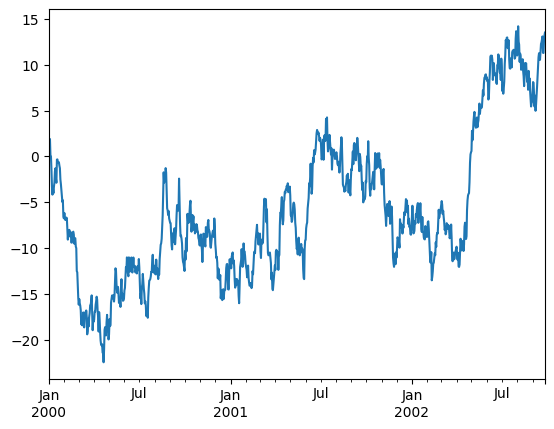

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,-0.376431,0.122997,1.432118,-1.062305
2000-01-02,1.611922,0.160014,-0.136664,-1.423192
2000-01-03,1.800275,0.996604,0.933530,0.067609
2000-01-04,0.140906,-0.022489,0.357304,-0.666612
2000-01-05,1.394389,1.534656,-0.243669,1.038441
...,...,...,...,...
2002-09-22,0.680189,1.820723,-2.949435,2.719310
2002-09-23,-0.306351,1.467208,-0.422378,1.574726
2002-09-24,1.366259,0.123996,1.204016,1.058884
2002-09-25,-0.992307,0.684853,-1.124239,-1.617212


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

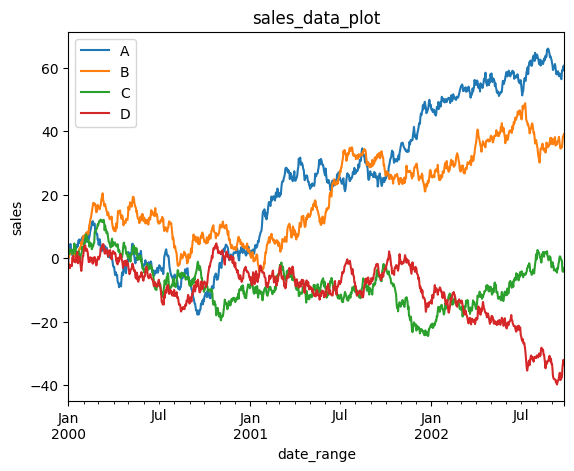

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
%pip install numpy==1.24.1


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage  

* **Array Creation:**  
    arange, array, copy, empty, empty_like, eye, fromfile, fromfunction,
    identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like  
* **Conversions:**  
    ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat
* **Manipulations:**  
    array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit,
    hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes,
    take, transpose, vsplit, vstack  
* **Questions:**  
    all, any, nonzero, where  
* **Ordering:**  
    argmax, argmin, argsort, max, min, ptp, searchsorted, sort  
* **Operations:**  
    choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask,
    real, sum  
* **Basic Statistics:**  
    cov, mean, std, var  
* **Basic Linear Algebra:**  
    cross, dot, outer, linalg.svd, vdot  

Numpy Usage Official Link - [Link](https://numpy.org/doc/1.18/numpy-user.pdf)  


In [57]:
import numpy as np

#### Numpy Array Creation  

[Back to contents](#table-of-contents)

In [58]:
# Generating a numpy array from list of elements
a = np.array([2,3,4])
a

array([2, 3, 4])

In [59]:
# Checking the data type in the numpy array
a.dtype

dtype('int32')

In [60]:
# Generating a numpy array with floating nos data type
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [61]:
# Generating a numpy array with complex nos data type
c = np.array([[1,2], [3,4]], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [62]:
# Generating a 2D - zero filled array of the 3 rows and 4 columns
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# Generating a 3D - 1 filled array of the 3 rows and 4 columns
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [64]:
# Generating numpy array with numbers between 0 and 2 for 9 numbers in total
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Numpy Printing Array

[Back to contents](#table-of-contents)

In [65]:
# Generating a 1D array
a = np.arange(6) 
print(a)

print('\n')

# Generating a 2D array
b = np.arange(12).reshape(4,3)
print(b)

print('\n')

# Generating a 3D array
c = np.arange(24).reshape(2,3,4) 
print(c)

[0 1 2 3 4 5]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Numpy Operations

[Back to contents](#table-of-contents)

In [66]:
# All arithmetic operations occur in numpy arrays at element level
a = np.array([20,30,40,50])
b = np.arange(4)

c = a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<30)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True False False False]


In [67]:
# Matrix level opeartions for 2 numpy arrays
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])

print(A*B) # Element wise multiplication of 2 arrays
print(A@B) # Matrix multiplication of 2 arrays
print(A.dot(B)) # Dot product of 2 arrays

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [68]:
# Other array operations
a = np.random.random((2,3))

print(a.sum())
print(a.min())
print(a.max())

2.617889098597754
0.009694899745544938
0.8402018194370712


In [69]:
# Sum of each column
print(a.sum(axis=0))

# Min of each row
print(a.min(axis=1))

# Cumulative sum along each row
print(a.cumsum(axis=1))

[0.5092442 1.0464378 1.0622071]
[0.37424885 0.0096949 ]
[[0.4995493  1.33975112 1.71399997]
 [0.0096949  0.21593088 0.90388912]]


#### Numpy Universal Functions  

List of functions:  
**all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj,
corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum,
mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose,
var, vdot, vectorize, where**

[Back to contents](#table-of-contents)

In [70]:
A = np.arange(3)
A

array([0, 1, 2])

In [71]:
# Perform exponential for each element in the array
np.exp(A)

array([1.        , 2.71828183, 7.3890561 ])

In [72]:
# Perform sq root for each element in the array
np.sqrt(A)

array([0.        , 1.        , 1.41421356])

In [73]:
C = np.array([2., -1., 4.])
np.add(A, C)

array([2., 0., 6.])

#### Numpy Indexing, Slicing & Iterating

[Back to contents](#table-of-contents)

In [74]:
# Generating a numpy array where each element if cubed again
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [75]:
print(a[2]) # Getting an element in specific index
print(a[2:5]) # Getting a sub array by using index range
a[0:6:2] = 10000 # Replacing array values at 0, 2, 4 places to 10000
print(a)

8
[ 8 27 64]
[10000     1 10000    27 10000   125   216   343   512   729]


In [76]:
# Looping across elements in an array
for element in np.arange(10):
    print(element)

0
1
2
3
4
5
6
7
8
9


#### Numpy Shape Manipulation

[Back to contents](#table-of-contents)

In [77]:
# Generating a random array for shape manipulation
a = np.floor(10*np.random.random((3,4)))
a

array([[9., 2., 0., 2.],
       [8., 5., 8., 3.],
       [6., 8., 7., 5.]])

In [78]:
print(a.shape) # Prints the shape of the array i.e. no of rows, no  of columns (dimensions)
print(a.ravel()) # Prints the flattened array
print(a.reshape(6,2)) # Reshapes the array to newer dimensions
print(a.T) # Transposing an array
a.resize((6,2)) # Resize and Reshape are same but resize modifies the array permanently
print(a)

(3, 4)
[9. 2. 0. 2. 8. 5. 8. 3. 6. 8. 7. 5.]
[[9. 2.]
 [0. 2.]
 [8. 5.]
 [8. 3.]
 [6. 8.]
 [7. 5.]]
[[9. 8. 6.]
 [2. 5. 8.]
 [0. 8. 7.]
 [2. 3. 5.]]
[[9. 2.]
 [0. 2.]
 [8. 5.]
 [8. 3.]
 [6. 8.]
 [7. 5.]]


In [79]:
# Array Stacking (Vertical and Horizontal Stacking)
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[6. 6.]
 [3. 4.]]
[[6. 5.]
 [8. 8.]]


In [80]:
print(np.vstack((a,b))) # Vertical Stack one array on another
print(np.hstack((a,b))) # Horizontal Stack one array on another

[[6. 6.]
 [3. 4.]
 [6. 5.]
 [8. 8.]]
[[6. 6. 6. 5.]
 [3. 4. 8. 8.]]


In [81]:
# Array Splitting (Vertical and Horizontal Splitting)
a = np.floor(10*np.random.random((2,12)))
a

array([[4., 8., 7., 7., 6., 3., 3., 6., 4., 0., 9., 3.],
       [3., 4., 0., 6., 5., 1., 5., 0., 7., 4., 6., 8.]])

In [82]:
print(np.hsplit(a,3)) # Splitting into multiple vertical arrays

[array([[4., 8., 7., 7.],
       [3., 4., 0., 6.]]), array([[6., 3., 3., 6.],
       [5., 1., 5., 0.]]), array([[4., 0., 9., 3.],
       [7., 4., 6., 8.]])]


#### Numpy Plotting  

[Back to contents](#table-of-contents)

In [83]:
import matplotlib.pyplot as plt

In [84]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x  = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2 # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i # note when
        z[diverge] = 2 # avoid diverging too much

    return divtime

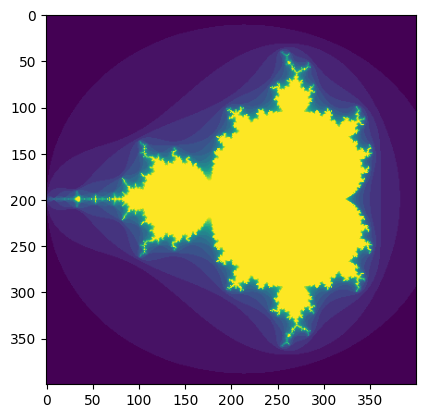

In [85]:
plt.imshow(mandelbrot(400,400))
plt.show()

## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

In [86]:
%pip install matplotlib==3.6.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Matplotlib Usage  

Matplotlib Usage Official Link - [Link](https://matplotlib.org/2.0.2/Matplotlib.pdf)  

![image.png](assets\matplotlib_figure.jpg)

#### Matplotlib Basic Types

#### Matplotlib Plotting Arrays

#### Matplotlib Statistical Plots

#### Matplotlib Unstructured Coordinates

#### Matplotlib 3D Plots

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage